In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
d=pd.read_csv('diabetes.csv')

In [3]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  768 non-null    int64  
 1   glucose      768 non-null    int64  
 2   diastolic    768 non-null    int64  
 3   triceps      768 non-null    int64  
 4   insulin      768 non-null    int64  
 5   bmi          768 non-null    float64
 6   dpf          768 non-null    float64
 7   age          768 non-null    int64  
 8   diabetes     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
d.describe

<bound method NDFrame.describe of      pregnancies  glucose  diastolic  triceps  insulin   bmi    dpf  age  \
0              6      148         72       35        0  33.6  0.627   50   
1              1       85         66       29        0  26.6  0.351   31   
2              8      183         64        0        0  23.3  0.672   32   
3              1       89         66       23       94  28.1  0.167   21   
4              0      137         40       35      168  43.1  2.288   33   
..           ...      ...        ...      ...      ...   ...    ...  ...   
763           10      101         76       48      180  32.9  0.171   63   
764            2      122         70       27        0  36.8  0.340   27   
765            5      121         72       23      112  26.2  0.245   30   
766            1      126         60        0        0  30.1  0.349   47   
767            1       93         70       31        0  30.4  0.315   23   

     diabetes  
0           1  
1           0  
2    

In [5]:
d.shape

(768, 9)

In [26]:
from sklearn.model_selection import train_test_split
x=d.drop('diabetes',axis=1).values
y=d.iloc[:,-1].values

In [27]:
x,y

(array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
        [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
        [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
        ...,
        [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
        [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
        [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]]),
 array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
        0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
        1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 

In [28]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)  


In [44]:
model = LogisticRegression(C=0.5)
model.fit(x_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.5)

In [45]:
model.classes_

array([0, 1])

In [46]:
model.intercept_

array([-7.6021734])

In [47]:
model.coef_

array([[ 0.08163601,  0.03068117, -0.01587124,  0.0087494 , -0.00121177,
         0.07643712,  1.11490731,  0.0251573 ]])

In [52]:
model.predict_proba(x_train)

array([[0.91777547, 0.08222453],
       [0.7693517 , 0.2306483 ],
       [0.90499646, 0.09500354],
       ...,
       [0.93397626, 0.06602374],
       [0.85258416, 0.14741584],
       [0.86685136, 0.13314864]])

In [53]:
p=model.predict(x_train)

In [54]:
model.score(x_train,y_train)

0.7638888888888888

In [55]:
m=confusion_matrix(y_train,p)
m

array([[321,  49],
       [ 87, 119]])

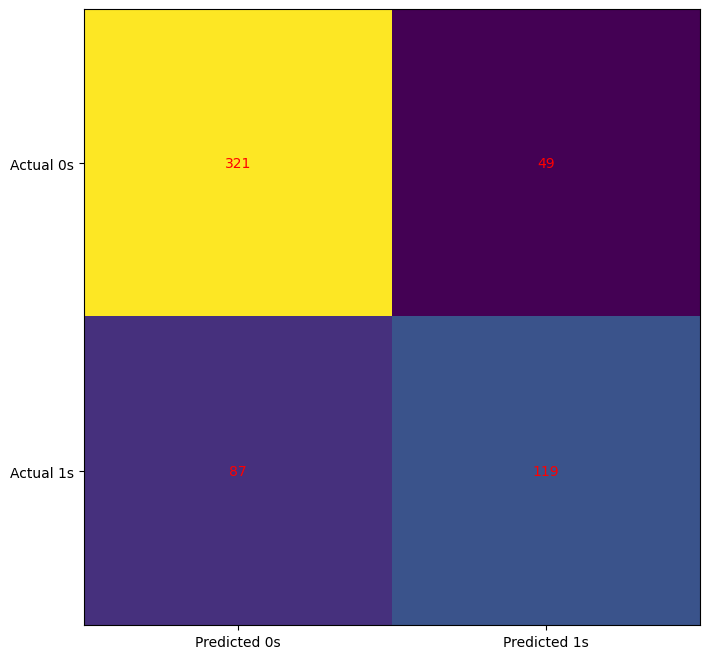

In [56]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(m)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, m[i, j], ha='center', va='center', color='red')
plt.show()

In [58]:
print(classification_report(y_train,p))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       370
           1       0.71      0.58      0.64       206

    accuracy                           0.76       576
   macro avg       0.75      0.72      0.73       576
weighted avg       0.76      0.76      0.76       576



In [59]:
model = LogisticRegression(C=0.5)
model.fit(x_test,y_test)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.5)

In [60]:
model.predict_proba(x_test)

array([[5.94119386e-02, 9.40588061e-01],
       [9.02988044e-01, 9.70119561e-02],
       [9.06480877e-01, 9.35191232e-02],
       [3.98013524e-01, 6.01986476e-01],
       [9.27229054e-01, 7.27709456e-02],
       [9.82047729e-01, 1.79522712e-02],
       [1.83103144e-01, 8.16896856e-01],
       [2.68631129e-01, 7.31368871e-01],
       [7.35666111e-01, 2.64333889e-01],
       [7.74833559e-01, 2.25166441e-01],
       [5.19848523e-01, 4.80151477e-01],
       [5.03815694e-02, 9.49618431e-01],
       [7.89402522e-01, 2.10597478e-01],
       [9.15803305e-01, 8.41966949e-02],
       [9.06579963e-01, 9.34200366e-02],
       [9.33150561e-01, 6.68494393e-02],
       [9.77487068e-02, 9.02251293e-01],
       [9.83120729e-01, 1.68792711e-02],
       [7.94274899e-01, 2.05725101e-01],
       [7.79908380e-01, 2.20091620e-01],
       [4.32023365e-01, 5.67976635e-01],
       [6.00759953e-01, 3.99240047e-01],
       [8.13372362e-01, 1.86627638e-01],
       [9.81258172e-01, 1.87418282e-02],
       [9.704629

In [61]:
pre=model.predict(x_test)

In [62]:
model.score(x_test,y_test)

0.8125

In [64]:
cm=confusion_matrix(y_test,pre)
cm

array([[119,  11],
       [ 25,  37]])

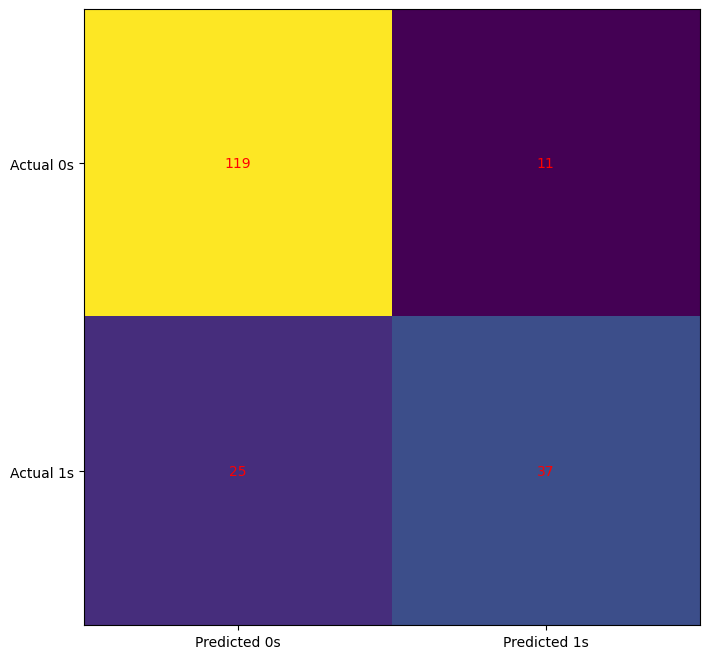

In [65]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [66]:
print(classification_report(y_test,pre))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       130
           1       0.77      0.60      0.67        62

    accuracy                           0.81       192
   macro avg       0.80      0.76      0.77       192
weighted avg       0.81      0.81      0.81       192

